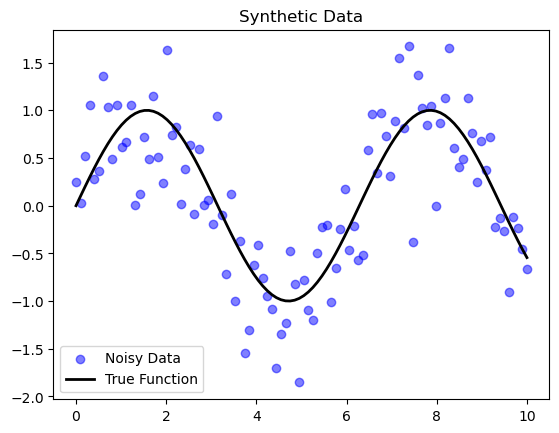

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ssgp import SSGP

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y_true = np.sin(X).flatten()  # True function: sin(x)
y_noise = 0.5 * np.random.randn(len(X))  # Add Gaussian noise
y = y_true + y_noise  # Noisy observations

# Plot the data
plt.scatter(X, y, label="Noisy Data", color="blue", alpha=0.5)
plt.plot(X, y_true, label="True Function", color="black", linewidth=2)
plt.legend()
plt.title("Synthetic Data")
plt.show()

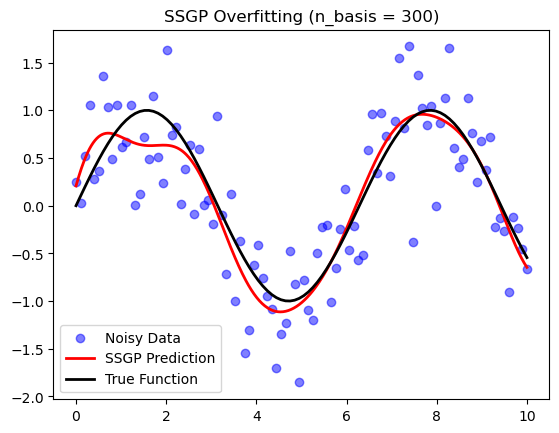

In [18]:
# Define SSGP with a large number of basis functions
n_basis = 300  # Too many basis functions for this small dataset
ssgp = SSGP(n_features=n_basis, length_scale=1.0, sigma_f=1.0, sigma_n=0.1)

# Fit the model
ssgp.fit(X, y)

# Predict on new data
X_test = np.linspace(0, 10, 500).reshape(-1, 1)
y_pred = ssgp.predict(X_test)

# Plot the results
plt.scatter(X, y, label="Noisy Data", color="blue", alpha=0.5)
plt.plot(X_test, y_pred, label="SSGP Prediction", color="red", linewidth=2)
plt.plot(X, y_true, label="True Function", color="black", linewidth=2)
plt.legend()
plt.title(f"SSGP Overfitting (n_basis = {n_basis})")
plt.show()

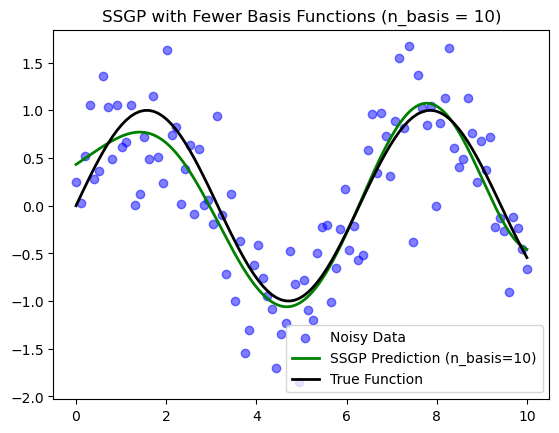

In [19]:
n_basis = 10  # Fewer basis functions
ssgp_simple = SSGP(n_features=n_basis, length_scale=1.0, sigma_f=1.0, sigma_n=0.1)
ssgp_simple.fit(X, y)

# Predict on new data
y_pred_simple = ssgp_simple.predict(X_test)

# Plot the results
plt.scatter(X, y, label="Noisy Data", color="blue", alpha=0.5)
plt.plot(X_test, y_pred_simple, label="SSGP Prediction (n_basis=10)", color="green", linewidth=2)
# plt.fill_between(X_test.flatten(), y_pred_simple - 2*y_std_simple, y_pred_simple + 2*y_std_simple, color="green", alpha=0.2)
plt.plot(X, y_true, label="True Function", color="black", linewidth=2)
plt.legend()
plt.title(f"SSGP with Fewer Basis Functions (n_basis = {n_basis})")
plt.show()